# Music playlist analysis

#### We use a dataset of songs from spotify with several attributes takem from Kaggle
#### We focus on the attributes that define the song, i.e.  'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
#### We will analyze the top genres and the statistics of the top songs from each genre
#### We will also narrow down on an artist and explore the kind of music they produce
#### These attributes will be used to cluster songs, songs in the same cluster will be similar to each other and can be put in the same playlist
#### We will use 4 clustering algorithms: KMeans, Agglomerative, DBSCAN and KMediods and comapre the output clusters from each of these algorithms

## 1) Import libraries and dataset:

In [155]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [156]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [157]:
df = pd.read_csv("/content/drive/MyDrive/DeepLearning/MLP1_MusicDataset/spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [159]:
df['language'].value_counts()

language
en    15405
es     1705
de      241
pt      176
it      133
pl       76
nl       72
fr       65
tl       63
da       40
id       34
ko       29
vi       24
so       16
sw       16
ro       16
cy       12
no       10
hi       10
ja        8
et        7
tr        5
sv        5
af        5
ru        4
sq        3
hr        3
ar        2
cs        2
ca        2
el        2
hu        1
fi        1
sk        1
Name: count, dtype: int64

In [160]:
en_songs = df[df['language'] == "en"].shape[0]
es_songs = df[df['language'] == "es"].shape[0]
total_songs = df.shape[0]

print("English and Spanish form ", np.round(((en_songs + es_songs)/ total_songs) * 100, 2)," % of the dataset")

English and Spanish form  92.72  % of the dataset


## 2) Focus on Spanish and English songs as they form 92.72% of the dataset:

In [161]:
df2 = df[(df['language'] == "en") | (df['language'] == "es")]
df2['language'].value_counts()

language
en    15405
es     1705
Name: count, dtype: int64

## 3) Analyze the top genres from English:

In [162]:
en_df = df2[df2['language'] == 'en']
es_df = df2[df2['language'] == 'es']

In [163]:
en_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [164]:
# pop is the most popular genre in English:
en_df[["playlist_genre", "track_popularity"]].groupby('playlist_genre').mean().sort_values(['track_popularity'], ascending=False)

,track_popularity
playlist_genre,
pop,48.483017
rock,42.241440
latin,41.928821
rap,41.580336
r&b,38.589370
edm,33.414107


In [165]:
# we will dive futher into pop and look for top songs, artists and albums:

en_df_pop = en_df[en_df['playlist_genre'] == "pop"]
en_df_pop.shape

(3739, 25)

In [166]:
en_df_pop.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [167]:
# the following are the top songs by popularity from pop along with the artists:

en_df_pop[["track_name", "track_artist", "track_popularity"]].groupby(['track_name', "track_artist"]).mean().sort_values(['track_popularity'], ascending=False).head(5)

,,track_popularity
track_name,track_artist,
Blinding Lights,The Weeknd,98.0
Memories,Maroon 5,98.0
Falling,Trevor Daniel,97.0
everything i wanted,Billie Eilish,97.0
Don't Start Now,Dua Lipa,97.0


In [168]:
# the following are the top artists by popularity from pop:

en_df_pop[["track_artist", "track_popularity"]].groupby([ "track_artist"]).mean().sort_values(['track_popularity'], ascending=False).head(5)

,track_popularity
track_artist,
Trevor Daniel,97.0
Regard,94.0
Juice WRLD,92.0
Tyga,91.0
Lil Tecca,90.0


In [169]:
# top albums from pop based on popularity and respective artists:

en_df_pop[["track_artist", "track_album_name", "track_popularity"]].groupby(["track_artist",
                                                                             "track_album_name"]).mean().sort_values(['track_popularity'], ascending=False).head(5)

,,track_popularity
track_artist,track_album_name,
Tones and I,Dance Monkey (Stripped Back) / Dance Monkey,100.0
Maroon 5,Memories,98.0
The Weeknd,Blinding Lights,98.0
Billie Eilish,everything i wanted,97.0
Dua Lipa,Don't Start Now,97.0


In [170]:
# top playlists from english pop:

en_df_pop[["playlist_name", "track_popularity"]].groupby(["playlist_name"]).mean().sort_values(['track_popularity'], ascending=False).head(5)

,track_popularity
playlist_name,
Todo Éxitos,80.611111
Someone You Loved Lewis Capaldi (Pop Music Mix),77.700000
Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,77.640000
Intro to Post-Teen Pop,77.437500
"post-teen alternative, indie, pop (large variety)",69.933333


In [171]:
# popularity of subgenres in pop:

en_df[["playlist_subgenre", "track_popularity"]].groupby('playlist_subgenre').mean().sort_values(['track_popularity'], ascending=False)

,track_popularity
playlist_subgenre,
reggaeton,59.700000
hip hop,58.089069
post-teen pop,56.672394
dance pop,56.085603
permanent wave,53.801932
urban contemporary,50.625285
trap,50.431373
hip pop,48.481840
latin pop,46.169492


# 4) developing playlists using clustering analysis on the dataset:

In [172]:
len(en_df['playlist_name'].value_counts())

401

#### there are 401 unique english songs playlists in the dataset
#### we will try to create our own list of playlists using clustering algorithms


In [173]:
en_df['playlist_name'].nunique()

401

In [174]:
# select features for clustering:

# we will check if the columns follow a Gaussian distribution, if they don't then we will scale them using standard scaler

en_df.columns

en_df_clustering = en_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

en_df_clustering.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [175]:
from scipy.stats import shapiro

stat,p =shapiro(en_df_clustering[['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']])

print("stat: ",stat,":","p :",p)
if p>0.05:
    print("gaussian distribution - fail to reject H0")
else:
    print("not gaussian distribution - reject H0")

stat:  0.4011309742927551 : p : 0.0
not gaussian distribution - reject H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [176]:
# as the data doesn't follow a Gaussian distribution, we will scale it using standard scaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaled = scaler.fit_transform(en_df_clustering[['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']])


In [177]:
scaled

array([[-2.17820444,  1.03889805,  1.01984377, ...,  1.04034318,
        -0.47175981,  0.53109639],
       [ 1.4104418 , -0.20379702,  0.18881001, ...,  1.97795155,
         0.61625346, -0.32687322],
       [-1.37042798, -1.69721127, -0.08820125, ..., -0.81242379,
        -0.46733699, -0.08078777],
       ...,
       [ 2.19173379, -0.47086745, -0.91923501, ...,  0.16216069,
         0.60298501,  0.33850298],
       [-1.15193107, -0.81424372, -0.08820125, ..., -0.49152402,
         0.64721319,  0.78836587],
       [ 1.32436726, -0.12749118, -1.19624627, ..., -0.77544768,
         1.32390437, -0.41399092]])

In [178]:
songs_normalized = pd.DataFrame(scaled, columns=[['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']])

songs_normalized.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-2.178204,1.038898,1.019844,0.720530,0.831040,-0.577054,-0.712378,-0.229535,1.040343,-0.471760,0.531096
1,1.410442,-0.203797,0.188810,-0.215446,-1.203311,1.141287,-0.746330,-0.247652,1.977952,0.616253,-0.326873
2,-1.370428,-1.697211,-0.088201,0.354941,-1.203311,-0.678074,2.403592,-0.295986,-0.812424,-0.467337,-0.080788
3,0.847647,1.077051,1.019844,1.650075,0.831040,-0.610061,-0.595983,-0.295986,-0.339658,-1.197102,0.339533
4,-0.900329,-0.274652,0.188810,0.240525,0.831040,-0.469033,0.521957,-0.295986,-0.607074,-0.909619,0.992401


In [179]:
# we're  working with a dataset that has 11 dimensions

### K-means clustering:

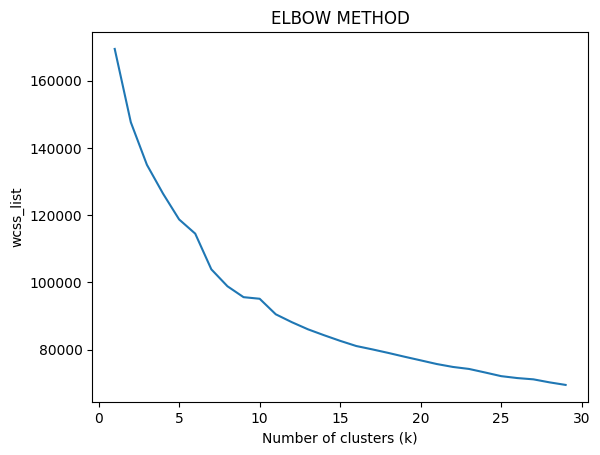

In [180]:
# 1) KMEANS clustering:
from sklearn.cluster import KMeans

wcss_list = []

for i in range(1,30):
    kmeans = KMeans(n_clusters = i ,init = "k-means++",random_state=42,  n_init= "auto")
    kmeans.fit(songs_normalized)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,30), wcss_list)
plt.title("ELBOW METHOD")
plt.xlabel('Number of clusters (k)')
plt.ylabel("wcss_list")
plt.show()

In [181]:
#from the graph we determine that 15 is the optimal number of clusters, so we apply kmeans with 15 clusters

kmeans = KMeans(n_clusters = 15 ,init = "k-means++",random_state=42)
kmeans.fit(songs_normalized)
y_predict = kmeans.fit_predict(songs_normalized)

songs_normalized['predicted_clusters_kmeans'] = y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [182]:
songs_normalized.iloc[:,:-1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-2.178204,1.038898,1.019844,0.720530,0.831040,-0.577054,-0.712378,-0.229535,1.040343,-0.471760,0.531096
1,1.410442,-0.203797,0.188810,-0.215446,-1.203311,1.141287,-0.746330,-0.247652,1.977952,0.616253,-0.326873
2,-1.370428,-1.697211,-0.088201,0.354941,-1.203311,-0.678074,2.403592,-0.295986,-0.812424,-0.467337,-0.080788
3,0.847647,1.077051,1.019844,1.650075,0.831040,-0.610061,-0.595983,-0.295986,-0.339658,-1.197102,0.339533
4,-0.900329,-0.274652,0.188810,0.240525,0.831040,-0.469033,0.521957,-0.295986,-0.607074,-0.909619,0.992401
...,...,...,...,...,...,...,...,...,...,...,...
15400,0.741709,0.139579,-1.473258,0.258804,0.831040,2.491555,-0.301546,-0.295986,-0.644050,-0.754820,1.257212
15401,-1.012888,0.602865,1.296855,0.368820,-1.203311,-0.140967,-0.740671,-0.295986,0.961109,-1.325364,0.265733
15402,2.191734,-0.470867,-0.919235,0.217845,0.831040,0.781216,-0.456586,-0.295946,0.162161,0.602985,0.338503
15403,-1.151931,-0.814244,-0.088201,0.138972,-1.203311,-0.749088,2.523207,-0.293125,-0.491524,0.647213,0.788366


In [183]:
en_df['predicted_clusters_kmeans'] = songs_normalized['predicted_clusters_kmeans']
en_df.columns

<ipython-input-183-f9501af5dfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['predicted_clusters_kmeans'] = songs_normalized['predicted_clusters_kmeans']


Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'predicted_clusters_kmeans'],
      dtype='object')

### DBSCAN:

In [141]:
# finding optimal parameters for DBSCAN:

# for a dataset with N dimensions (here N = 11), n_neighbors = 2*N -1 (21)
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=21)
nbrs = neigh.fit(songs_normalized.iloc[:,:-1])
distances, indices = nbrs.kneighbors(songs_normalized.iloc[:,:-1])

In [142]:
distances, indices

(array([[0.        , 1.11378938, 1.13623544, ..., 1.46119945, 1.47160128,
         1.48478687],
        [0.        , 0.20186704, 0.89589709, ..., 1.77884346, 1.80663793,
         1.81039354],
        [0.        , 1.01902508, 1.15409429, ..., 1.83902116, 1.84118137,
         1.88573495],
        ...,
        [0.        , 0.93004258, 0.93004258, ..., 1.56977895, 1.57708918,
         1.59186282],
        [0.        , 1.06855252, 1.37494896, ..., 1.82599102, 1.90902119,
         1.94454769],
        [0.        , 0.        , 0.56943534, ..., 1.02105224, 1.022412  ,
         1.06458681]]),
 array([[    0,  1241,  6075, ...,  1490,  8797,  5138],
        [    1,  4543,  4088, ..., 14978,  2022,  9024],
        [    2,  8066,  8748, ...,  5542,  3194,  4493],
        ...,
        [15402, 11570, 13238, ..., 14830,  9470,  7775],
        [15403,  1338,  9084, ...,  2598,  5366,  1602],
        [13459, 15404,  6013, ...,  5086, 15146,   955]]))

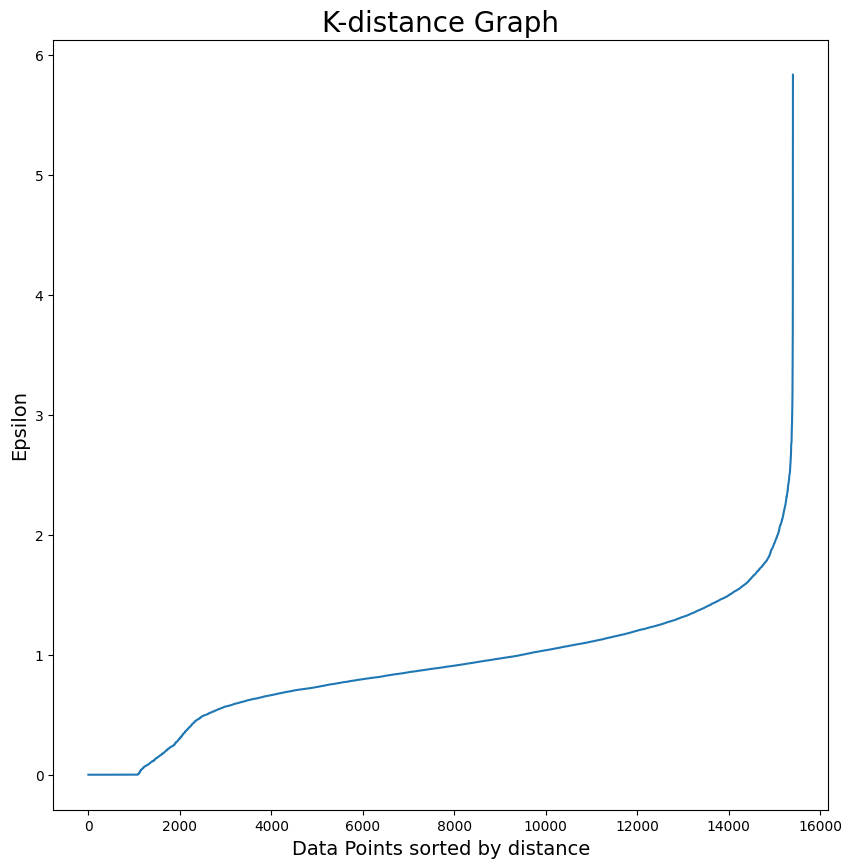

In [143]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# take epsolin value as 1.75

In [148]:
from sklearn.cluster import DBSCAN

db_default = DBSCAN(eps=1.75,min_samples=10).fit(songs_normalized.iloc[:,:-1])
labels = db_default.labels_
set(labels)

{-1, 0, 1, 2}

In [151]:
for i in range(4, 16):
  db_default = DBSCAN(eps=1.75,min_samples=i).fit(songs_normalized.iloc[:,:-1])
  labels = db_default.labels_
  print("index: ",i," || number of clusters: ",set(labels))

index:  4  || number of clusters:  {0, 1, 2, 3, 4, 5, 6, -1}
index:  5  || number of clusters:  {0, 1, 2, 3, 4, 5, 6, -1}
index:  6  || number of clusters:  {0, 1, 2, 3, -1}
index:  7  || number of clusters:  {0, 1, 2, 3, -1}
index:  8  || number of clusters:  {0, 1, 2, -1}
index:  9  || number of clusters:  {0, 1, 2, 3, -1}
index:  10  || number of clusters:  {0, 1, 2, -1}
index:  11  || number of clusters:  {0, 1, -1}
index:  12  || number of clusters:  {0, 1, -1}
index:  13  || number of clusters:  {0, 1, 2, 3, 4, -1}
index:  14  || number of clusters:  {0, 1, 2, 3, 4, -1}
index:  15  || number of clusters:  {0, 1, 2, 3, 4, -1}


In [152]:
# we stick to 5 min_samples:

db_default = DBSCAN(eps=1.75,min_samples=10).fit(songs_normalized.iloc[:,:-1])
labels = db_default.labels_
set(labels)

{-1, 0, 1, 2}

In [154]:
len(labels)

15405

In [184]:
en_df['predicted_clusters_dbscan'] = labels
en_df.columns

<ipython-input-184-1feda0627953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['predicted_clusters_dbscan'] = labels


Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'predicted_clusters_kmeans',
       'predicted_clusters_dbscan'],
      dtype='object')

In [185]:
en_df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,predicted_clusters_kmeans,predicted_clusters_dbscan
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en,8.0,0
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en,11.0,1
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en,3.0,1
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en,12.0,0
5,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,3GNzXsFbzdwM0WKCZtgeNP,Chapters,2019-04-26,urban contemporary,4WiB26kw0INKwbzfb5M6Tv,...,0.0550,0.28000,0.00000,0.0975,0.305,147.764,224720,en,11.0,0
